# Machine Learning Algorithms
A simple script that analyses a data frame using fundamental statisical learning algorithms and a feed forward neural network. <br>
Written by: Da'Vel Reed Johnson

In [1]:
#Load Required Modules
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Ignore Unnecessary Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Set path
main_path = os.path.dirname(os.path.abspath("__file__"))

In [2]:
#Opening the data file
filename = main_path + '/data/Employee.csv'

df = pd.read_csv(filename)

## Gathering information about the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [4]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [5]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## Base plots and graphics

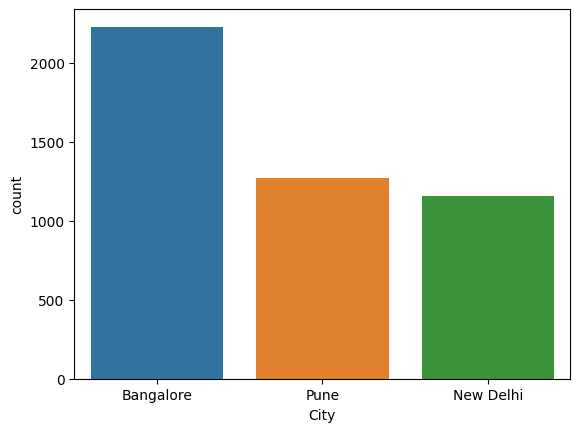

In [6]:
p = sns.countplot(data=df, x = 'City')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

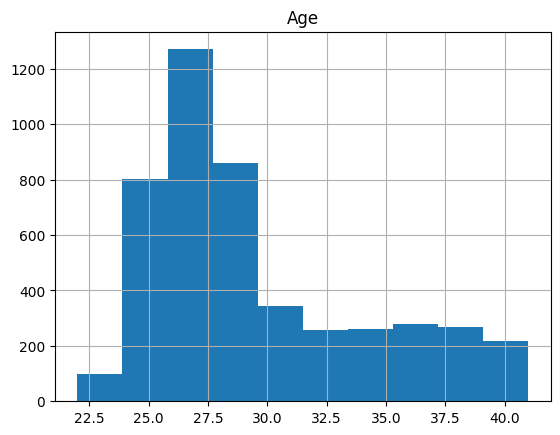

In [7]:
df.hist(column='Age')

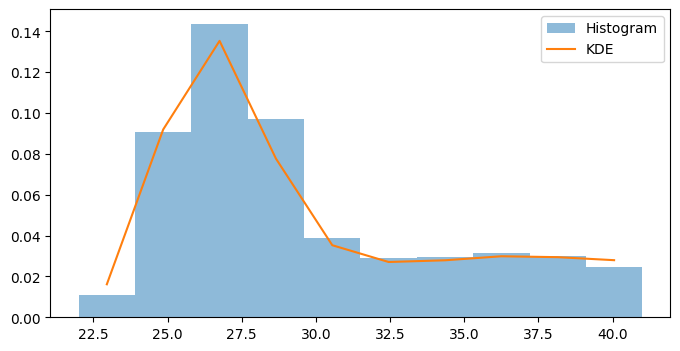

In [8]:
from scipy.stats import gaussian_kde

# Create histogram data
hist_counts, bin_edges = np.histogram(df['Age'], bins=10, density=True)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Adjust the bandwidth
bandwidth_factor = 0.1  # Adjust this factor as needed (less than 1 for smaller bandwidth)

# Estimate KDE
kde = gaussian_kde(df['Age'], bw_method=bandwidth_factor)
kde_values = kde(bin_centers)

# Plot histogram and KDE
plt.figure(figsize=(8, 4))
plt.hist(df['Age'], bins=10, density=True, alpha=0.5, label='Histogram')
plt.plot(bin_centers, kde_values, label='KDE')
plt.legend()
plt.show()

<AxesSubplot:ylabel='Education'>

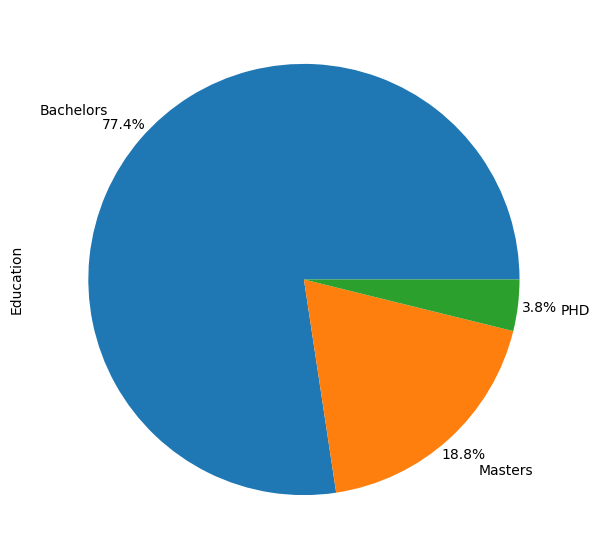

In [9]:
df['Education'].value_counts().plot(kind='pie',figsize=(8, 7), autopct='%1.1f%%',pctdistance=1.1,labeldistance=1.2)

In [10]:
#Check to see if there are any empty entries
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

# Preparing Data for model training

In [11]:
#Assigning features and classes to training variables
X = df[['Education','JoiningYear','PaymentTier','Gender','EverBenched','Age','ExperienceInCurrentDomain']]
y = df['LeaveOrNot']

In [12]:
#Creating dummy variables from categorical variables for numerical analysis
df_dummies = pd.get_dummies(X)

In [13]:
df_dummies.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
0,2017,3,34,0,1,0,0,0,1,1,0
1,2013,1,28,3,1,0,0,1,0,1,0
2,2014,3,38,2,1,0,0,1,0,1,0
3,2016,3,27,5,0,1,0,0,1,1,0
4,2017,3,24,2,0,1,0,0,1,0,1


In [14]:
# Removing Gender and EverBenched for duplication
print(f"Number of columns before deleting: {df_dummies.shape[1]}")

del_cols = ['Gender_Male','EverBenched_No']
df_dummies.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {df_dummies.shape[1]}")

Number of columns before deleting: 11
Number of columns after deleting: 9


In [15]:
#Normalizing data for processing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_dummies), columns=df_dummies.columns)

In [16]:
df_normalized.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,Education_Bachelors,Education_Masters,Education_PHD,Gender_Female,EverBenched_Yes
0,1.039638,0.537503,0.954645,-1.864901,0.540501,-0.480575,-0.200022,-0.821551,-0.338365
1,-1.107233,-3.025177,-0.288732,0.060554,0.540501,-0.480575,-0.200022,1.217210,-0.338365
2,-0.570515,0.537503,1.783563,-0.581264,0.540501,-0.480575,-0.200022,1.217210,-0.338365
3,0.502921,0.537503,-0.495961,1.344191,-1.850136,2.080840,-0.200022,-0.821551,-0.338365
4,1.039638,0.537503,-1.117650,-0.581264,-1.850136,2.080840,-0.200022,-0.821551,2.955387


In [17]:
#Converting the dependent variable to binary 
dy = pd.get_dummies(y)

In [18]:
dy.head()

,0,1
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1


In [19]:
dy.columns

Int64Index([0, 1], dtype='int64')

In [20]:
dummyy = dy[1]

In [21]:
dummyy.head()

0    0
1    1
2    0
3    1
4    1
Name: 1, dtype: uint8

## Training and Running Fundamental Models

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, dummyy, test_size=0.3, stratify=y)

### Gaussian Naive Bayes

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [25]:
# Fit train set for Gaussian Naive Bayes
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [26]:
# Predict for test set
GNBy_pred = GNB.predict(X_test)
print(classification_report(y_test,GNBy_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       916
           1       0.44      0.40      0.42       480

    accuracy                           0.62      1396
   macro avg       0.57      0.57      0.57      1396
weighted avg       0.61      0.62      0.61      1396



### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
rfc = RandomForestClassifier(n_estimators=600, max_features='sqrt' , oob_score=True, random_state=None, n_jobs=-1)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=600, n_jobs=-1,
                       oob_score=True)

In [29]:
predictions = rfc.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       916
           1       0.75      0.61      0.67       480

    accuracy                           0.80      1396
   macro avg       0.78      0.75      0.76      1396
weighted avg       0.79      0.80      0.79      1396



In [31]:
print(confusion_matrix(y_test,predictions))

[[817  99]
 [186 294]]


#### Plotting feature importance

In [32]:
rfc.feature_importances_

array([0.36993883, 0.15279381, 0.20232763, 0.10050123, 0.03074463,
       0.03901756, 0.0093493 , 0.07130973, 0.02401728])

In [33]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(100,80))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

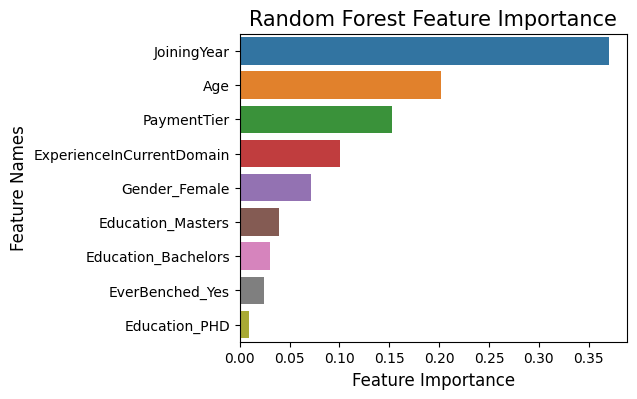

In [34]:
plot_feature_importance(rfc.feature_importances_, X_train.columns, 'RANDOM FOREST')
plt.title('Random Forest Feature Importance', fontsize=15) 
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature Names', fontsize=12)
fig = plt.gcf()
fig.set_size_inches(5, 4)
plt.show()

### Gradient Boosting Classifier

In [35]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingClassifier(n_estimators=300,
                               max_depth=2,
                               learning_rate=0.8)

gb.fit(X_train, y_train)
gby_pred = gb.predict(X_test)

#### Finding optimal hyperparameters

In [36]:
hyperparameter_space = {'n_estimators':[300, 350, 400, 450, 500], 
                        'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        'max_depth':[1, 2]}

from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(GradientBoostingClassifier(), 
                        param_distributions=hyperparameter_space,
                        n_iter=10, scoring="neg_root_mean_squared_error", 
                        random_state=None, n_jobs=-1, cv=5)


rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)

Optimal hyperparameter combination: {'n_estimators': 300, 'max_depth': 2, 'learning_rate': 0.5}


In [37]:
print(classification_report(y_test,gby_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       916
           1       0.79      0.57      0.67       480

    accuracy                           0.80      1396
   macro avg       0.80      0.75      0.76      1396
weighted avg       0.80      0.80      0.79      1396



In [38]:
print(confusion_matrix(y_test,gby_pred))

[[843  73]
 [204 276]]


### Extreme Gradient Boosting Classifier

In [39]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [40]:
xgb = XGBClassifier()
#XGB
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [41]:
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       916
           1       0.79      0.61      0.69       480

    accuracy                           0.81      1396
   macro avg       0.80      0.76      0.77      1396
weighted avg       0.81      0.81      0.80      1396

[[838  78]
 [189 291]]


In [42]:
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'reg_lambda': [1, 1.5, 2, 2.5, 3]
}

xgb = XGBClassifier()
rs = RandomizedSearchCV(xgb, param_dist, n_iter=25, scoring='accuracy', cv=3, verbose=1, random_state=42)
rs.fit(X_train, y_train)


rs.fit(X_train, y_train)
print("Optimal hyperparameter combination:", rs.best_params_)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Fitting 3 folds for each of 25 candidates, totalling 75 fits
Optimal hyperparameter combination: {'reg_lambda': 2, 'n_estimators': 200, 'max_depth': 4, 'gamma': 0.3}


In [66]:
xgb = XGBClassifier(
    n_estimators=200,
    reg_lambda=2,
    gamma=0.3,
    max_depth=4
)

In [67]:
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

In [68]:
print(classification_report(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_xgb)

# Print the accuracy
print("Accuracy:", accuracy)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       775
           1       0.86      0.64      0.73       389

    accuracy                           0.84      1164
   macro avg       0.85      0.79      0.81      1164
weighted avg       0.85      0.84      0.84      1164

[[734  41]
 [140 249]]
Accuracy: 0.8445017182130584


### Feed Forward Neural Network

In [46]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [47]:
class BasicNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(BasicNeuralNetwork, self).__init__()
        # Define the first hidden layer
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        
        # Define the second hidden layer
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        
        # Define the output layer
        self.output = nn.Linear(hidden_size2, output_size)

    def forward(self, x):
        # Apply a non-linear activation function / ReLU after each hidden layer
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        
        # The output layer
        x = self.output(x)
        return x #Use F.softmax(x, dim=1) to apply a softmax for multi-class problems

#### Designing a Neural Network through rules of thumb

In [48]:
num_features = df_normalized.shape[1]
num_output = 1
hidden_size = int((num_features * num_output)**0.5)
print(f'Number of features: {num_features}')
print(f'Output Size: {num_output}')
print(f'Number of neurons: {hidden_size}')

Number of features: 9
Output Size: 1
Number of neurons: 3


In [49]:
# Example usage
input_size = num_features  # Size of input (number of input features)
hidden_size1 = hidden_size #Size of first hidden layer
hidden_size2 = hidden_size #Size of second hidden layer
output_size = num_output  # Size of output (number of classes for classification)

model = BasicNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_normalized, dummyy, test_size=0.3, stratify=y)

In [51]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# Create datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Data Loaders
batch_size = 64  # Define your batch size
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = BasicNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.BCEWithLogitsLoss()
#For binary classification, use nn.BCEWithLogitsLoss and for multi-class, use nn.CrossEntropyLoss. 

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_iterations = 100  # Define the number of epochs
for epoch in range(num_iterations):
    model.train()
    for inputs, targets in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        outputs = outputs.squeeze() 
        
        # Compute the loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_iterations}], Loss: {loss.item():.4f}')

# Testing Loop Adjustment for Binary Classification
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        outputs = outputs.squeeze() 
        # Threshold the outputs to get binary predictions
        predicted = outputs > 0  # or use a different threshold like 0.5
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')    

Epoch [1/100], Loss: 0.6408
Epoch [2/100], Loss: 0.6753
Epoch [3/100], Loss: 0.6444
Epoch [4/100], Loss: 0.6716
Epoch [5/100], Loss: 0.6216
Epoch [6/100], Loss: 0.6463
Epoch [7/100], Loss: 0.6104
Epoch [8/100], Loss: 0.5612
Epoch [9/100], Loss: 0.5875
Epoch [10/100], Loss: 0.5974
Epoch [11/100], Loss: 0.5579
Epoch [12/100], Loss: 0.5028
Epoch [13/100], Loss: 0.5169
Epoch [14/100], Loss: 0.5584
Epoch [15/100], Loss: 0.5550
Epoch [16/100], Loss: 0.5076
Epoch [17/100], Loss: 0.4721
Epoch [18/100], Loss: 0.4061
Epoch [19/100], Loss: 0.5048
Epoch [20/100], Loss: 0.4553
Epoch [21/100], Loss: 0.5402
Epoch [22/100], Loss: 0.5596
Epoch [23/100], Loss: 0.4579
Epoch [24/100], Loss: 0.5606
Epoch [25/100], Loss: 0.6977
Epoch [26/100], Loss: 0.5118
Epoch [27/100], Loss: 0.5208
Epoch [28/100], Loss: 0.4138
Epoch [29/100], Loss: 0.4053
Epoch [30/100], Loss: 0.4146
Epoch [31/100], Loss: 0.3788
Epoch [32/100], Loss: 0.4323
Epoch [33/100], Loss: 0.5953
Epoch [34/100], Loss: 0.5217
Epoch [35/100], Loss: 0

#### Designing a Neural Network through trial and error

In [52]:
class TE_NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(TE_NeuralNetwork, self).__init__()
        
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.hidden3 = nn.Linear(hidden_size2, hidden_size3)
        
        # Define the output layer
        self.output = nn.Linear(hidden_size3, output_size)

    def forward(self, x):
        # Apply a non-linear activation function / ReLU after each hidden layer
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.relu(self.hidden3(x))
        
        # The output layer
        x = self.output(x)
        return x 

In [53]:
num_features = df_normalized.shape[1]
hidden_size = 45
hidden_step = 9
num_output = 1
print(f'Number of features: {num_features}')
print(f'Output Size: {num_output}')
print(f'Number of neurons: {hidden_size}')
print(f'Number of neurons layer 3: {hidden_step}')

Number of features: 9
Output Size: 1
Number of neurons: 45
Number of neurons layer 3: 9


In [54]:
# Example usage
input_size = num_features  # Size of input (number of input features)
hidden_size1 = hidden_size #Size of first hidden layer
hidden_size2 = hidden_size #Size of second hidden layer
hidden_size3 = hidden_step #Size of third hidden layer
output_size = num_output  # Size of output (number of classes for classification)

model = TE_NeuralNetwork(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)

In [55]:
# Data Loaders
batch_size = 64  # Define your batch size
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = BasicNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size)
criterion = nn.BCEWithLogitsLoss()
#For binary classification, use nn.BCEWithLogitsLoss and for multi-class, use nn.CrossEntropyLoss. 

optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_iterations = 128  # Define the number of epochs
for epoch in range(num_iterations):
    model.train()
    for inputs, targets in train_loader:
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(inputs)
        outputs = outputs.squeeze() 
        
        # Compute the loss
        loss = criterion(outputs, targets)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()

# Testing Loop Adjustment for Binary Classification
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, targets in test_loader:
        outputs = model(inputs)
        outputs = outputs.squeeze() 
        # Threshold the outputs to get binary predictions
        predicted = outputs > 0  # or use a different threshold like 0.5
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')    

Accuracy of the model on the test set: 81.23%


### Training and Testing Additional Machine Learning Algorithms
Adapted from <a href='https://github.com/pooja2512/Adult-Census-Income/blob/master/Adult%20Census%20Income.ipynb' target="_blank">Pooja Joshi</a>

In [56]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [57]:
X_train,X_test,y_train,y_test = train_test_split(df_normalized, dummyy,test_size =0.25,random_state = 42)

In [58]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()

In [59]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive']

In [60]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_extratrees:'Extratrees' ,
          clf_gnb: 'Naive'}

In [61]:
# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 70.6186%
Null Accuracy: 66.5808%
Confusion Matrix
[[694  81]
 [261 128]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 70.6186%
Recall Score: 32.9049%
Specificity Score: 89.5484%
False Positive Rate: 10.4516%
Precision Score: 61.2440%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.90      0.80       775
           1       0.61      0.33      0.43       389

    accuracy                           0.71      1164
   macro avg       0.67      0.61      0.62      1164
weighted avg       0.69      0.71      0.68      1164

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 

In [62]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
RandomForest,0.826460
Bagging,0.823883
Extratrees,0.821306
SVC,0.820447
Adaboost,0.816151
DecisionTree,0.807560
KNN,0.800687
LogisticRegression,0.706186
Naive,0.649485


A Random Forest appears to perform the best of the common models but still under perform XGBoost.

#### Running the models without normalization or dropping features

In [63]:
X_train,X_test,y_train,y_test = train_test_split(pd.get_dummies(X), dummyy,test_size =0.25,random_state = 42)

In [64]:
# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 69.7595%
Null Accuracy: 66.5808%
Confusion Matrix
[[697  78]
 [274 115]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 69.7595%
Recall Score: 29.5630%
Specificity Score: 89.9355%
False Positive Rate: 10.0645%
Precision Score: 59.5855%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       775
           1       0.60      0.30      0.40       389

    accuracy                           0.70      1164
   macro avg       0.66      0.60      0.60      1164
weighted avg       0.68      0.70      0.66      1164

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 

C:\Users\u2rac\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
C:\Users\u2rac\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\u2rac\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\u2rac\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

--------------------------------------------RandomForest---------------------------------------------------
Accuracy Score for RandomForest: 81.8729%
Null Accuracy: 66.5808%
Confusion Matrix
[[693  82]
 [129 260]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 81.8729%
Recall Score: 66.8380%
Specificity Score: 89.4194%
False Positive Rate: 10.5806%
Precision Score: 76.0234%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       775
           1       0.76      0.67      0.71       389

    accuracy                           0.82      1164
   macro avg       0.80      0.78      0.79      1164
weighted avg       0.82      0.82      0.82      1164

--------------------------------------------Adaboost---------------------------------------------------
Accuracy Score for Adaboost: 81.6151%
Null Accura

In [65]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
Extratrees,0.824742
RandomForest,0.818729
Adaboost,0.816151
Bagging,0.816151
DecisionTree,0.808419
KNN,0.775773
Naive,0.702749
LogisticRegression,0.697595
SVC,0.665808


Improvements can be noted in the Naive Bayes and Bagging models, but there's a big drop in the Support Vector Classifier performance. Overall the models seem have greater accuracy with normalization. 